# Match COSMOS with DESY3 Deep Field

The inupt directories were retrieved from:

COSMOS 2015 (Laigle et al 2016) <br>
<i>/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits</i><br>

DES Deep Field Y3<br>
<i>/data/des70.a/data/annis/StellarMass-2021/y3_deep_fields.fits</i><br>

For more information: https://cdcvs.fnal.gov/redmine/projects/des-sci-release/wiki/Y3_deep_fields_cat


In [1]:
import esutil
import numpy as np
import os
import esutil

In [2]:
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

In [4]:
#image path
path = '../graphs/'

# Loading the deep fields

In [5]:
des_deep_field_infile = '/data/des70.a/data/annis/StellarMass-2021/y3_deep_fields.fits'
des0 = Table(getdata(des_deep_field_infile))

In [6]:
des0['row'] = np.arange(len(des0),dtype=np.int64)

In [7]:
des0

ID,RA,DEC,TILENAME,MAG_U,MAG_G,MAG_R,MAG_I,MAG_Z,MAG_J,MAG_H,MAG_KS,MAGERR_U,MAGERR_G,MAGERR_R,MAGERR_I,MAGERR_Z,MAGERR_J,MAGERR_H,MAGERR_KS,BDF_FRACDEV,BDF_T,BDF_T_RATIO,row
int64,float64,float64,str32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
692016671,52.004214999999995,-28.000093,SN-C3_C26,26.1941253280812,24.9959243415065,24.9361152402901,24.9678749166613,24.5704519788764,24.5544593350045,23.9643458849102,23.4578471128541,0.327994680956943,0.0682083057098865,0.0800793408437564,0.117909846059694,0.153732238634536,0.0619439539012224,0.0590109366609468,0.0514384008090265,0.52049575504551,0.608481477457793,0.835835698493977,0
692016672,51.977779999999996,-27.999786,SN-C3_C26,25.4199912180478,25.3984889909989,25.1454392728965,24.8045537557133,24.2230809598576,23.7257869790259,23.6056042292541,23.4915803554274,0.1426550029156,0.0603848422534971,0.0676505041960723,0.0768871785124578,0.0873411165232766,0.190843114584784,0.230762672906638,0.261967983051327,0.499980331321826,0.0547831137460798,0.0751258463597854,1
692016673,51.814443,-28.004469,SN-C3_C26,21.1357647309935,20.4861456515528,19.5316725252753,19.149476985606,18.8427599626576,18.4200486173287,18.1614187893385,17.9136563197699,0.015421665672099,0.00422281923495345,0.00310097908645819,0.00347160222664796,0.00454692302624948,0.0650625171494162,0.0553753748831547,0.038095040760989,9.43911615536308e-13,2.58558469660883,3.47311151779601,2
692016674,51.805471999999995,-27.999744,SN-C3_C26,26.5295419728803,26.2042659278795,25.9944848432716,26.331231703522,25.4576940026754,25.9626292751767,24.9886806530976,24.418212791245,0.409107813870488,0.134358323132623,0.149789628105161,0.278180483061203,0.250810810884531,0.512063160552519,0.299384711695278,0.230631528896287,0.500182062309831,0.0435887552328438,0.0583073232246856,3
692016675,52.046735,-27.999821999999998,SN-C3_C26,23.9691403568646,24.1213463592718,24.1486381177255,24.083406465751,23.9468199661688,23.635252910393,23.8797220665512,23.4783142916573,0.050628057487446,0.0258945700549933,0.0328004631627133,0.0470410870243525,0.0773918677147558,0.0478916794361528,0.088866712395557,0.0831659191590529,0.339821728939668,0.202119844317184,0.281798754644895,4
692016676,52.090387,-27.999854,SN-C3_C26,25.489750988975,25.4075176687297,24.3766272554401,23.9217356118972,23.6823774467326,23.016395717424,22.9853867626932,22.8210335909338,0.218661831604687,0.0970223595869377,0.0686419939961237,0.0727575326271568,0.0986918825245015,0.284527362164376,0.370001702978352,0.433394064393124,0.223237992574445,0.993344582639354,1.38294048340879,5
692016677,51.902096,-27.999879999999997,SN-C3_C26,26.2697152233747,26.171561782232,26.1780200141698,25.9309239255249,25.5424903388733,-9999000000.0,-9999000000.0,-9999000000.0,0.338852473750032,0.181044300270754,0.21748692303725,0.260035097318754,0.323586600644468,9999000000.0,9999000000.0,9999000000.0,0.492700114393274,0.227324666568336,0.306446934240328,6
692016678,51.914114,-27.999893,SN-C3_C26,25.6611775161731,25.371181563066,25.0197002501602,24.9028511686628,24.3262813428721,-9999000000.0,-9999000000.0,-9999000000.0,0.198886605626478,0.075864074912921,0.07797397930973,0.104618350205324,0.117904269557974,9999000000.0,9999000000.0,9999000000.0,0.473157517745584,0.230478453008924,0.311649539453295,7
692016679,51.957259,-27.999854,SN-C3_C26,25.593620356666,24.9955564192886,24.5060629533044,24.4802814402345,24.4400173961539,24.5710021966435,23.6386490251344,23.6355676767168,0.17651886890159,0.0491951647712722,0.0466037139660495,0.0670642929847768,0.113439745152806,0.538959043873964,0.409251915521266,0.573291494787366,0.433941307957469,0.155853659709346,0.212879062199463,8


In [8]:
patch = (des0['RA']>140)&(des0['DEC']>0)
des   = des0[patch]

In [48]:
cosmo_infile = '/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits'
cosmo0  = Table(getdata(cosmo_infile))

In [49]:
indices= np.arange(len(cosmo0),dtype=np.int)
cosmo0['ID'] = indices

In [11]:
cosmo0

ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLAG_HJMCC,FLUX_RADIUS,KRON_RADIUS,EBV,FLAG_PETER,FLAG_COSMOS,FLAG_DEEP,FLAG_SHALLOW,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Ks_FLAGS,Ks_IMAFLAGS_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,Y_FLAGS,Y_IMAFLAGS_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,H_FLAGS,H_IMAFLAGS_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,J_FLAGS,J_IMAFLAGS_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,B_FLAGS,B_IMAFLAGS_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,V_FLAGS,V_IMAFLAGS_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,ip_FLAGS,ip_IMAFLAGS_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,r_FLAGS,r_IMAFLAGS_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,u_FLAGS,u_IMAFLAGS_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zp_FLAGS,zp_IMAFLAGS_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,zpp_FLAGS,zpp_IMAFLAGS_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA484_FLAGS,IA484_IMAFLAGS_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA527_FLAGS,IA527_IMAFLAGS_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA624_FLAGS,IA624_IMAFLAGS_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA679_FLAGS,IA679_IMAFLAGS_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA738_FLAGS,IA738_IMAFLAGS_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IA767_FLAGS,IA767_IMAFLAGS_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB427_FLAGS,IB427_IMAFLAGS_ISO,IB464_FLUX_APER2,IB464_FLUXERR_APER2,IB464_FLUX_APER3,IB464_FLUXERR_APER3,IB

In [12]:
cosmo0.colnames

['ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO',
 'H_MAGERR_ISO',
 'H_FLAGS',
 'H_IMAFLAGS_ISO',
 'J_FLUX_APER2',
 'J_FLUXERR_APER2',


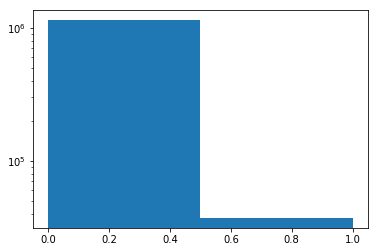

In [50]:
mybins = np.array([0.,0.5,1.])
_ = plt.hist(cosmo0['TYPE'],bins=mybins)
plt.yscale('log')

In [51]:
1.*np.count_nonzero(cosmo0['TYPE'])/len(cosmo0)

0.034563677768867145

In [88]:
## only galaxies
gals, = np.where(cosmo0['TYPE']<1)
#cosmo= cosmo0[gals]

TypeError: 'int' object has no attribute '__getitem__'

In [53]:
cosmo=cosmo0

In [92]:
gal_idx = np.where(gals)[0]

# Preparing To Sky Match 

In [54]:
nsize = {'cosmo':len(cosmo0),'des':len(des)}

In [55]:
nsize['cosmo'], nsize['des']

(1182108, 709987)

In [56]:
indices

array([      0,       1,       2, ..., 1182105, 1182106, 1182107])

In [57]:
mycols = ['ID','ALPHA_J2000','DELTA_J2000','ip_MAG_AUTO','r_MAG_AUTO']

In [61]:
match = cosmo0[mycols]
match.rename_column('ALPHA_J2000','RA')
match.rename_column('DELTA_J2000','DEC')

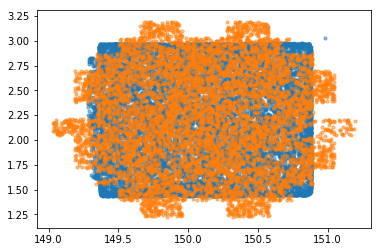

In [62]:
plt.scatter(match[::100]['RA'],match[::100]['DEC'],s=10,alpha=0.5)
plt.scatter(des[::100]['RA'],des[::100]['DEC'],s=10,alpha=0.5)

In [63]:
match

ID,RA,DEC,ip_MAG_AUTO,r_MAG_AUTO
int64,float64,float64,float32,float32
0,149.68318763276815,1.4354018133896047,99.0,27.028883
1,149.6866381780836,1.4354525227506005,99.0,26.166887
2,149.67109752619135,1.4354506867590184,99.0,99.0
3,149.69751106098735,1.4354887680463875,99.0,27.944986
4,149.6805331339998,1.4354870618513438,99.0,99.0
5,149.6946928828636,1.4354795137759895,99.0,27.414648
6,149.6655271567776,1.435461597929882,99.0,99.0
7,149.72351594321586,1.435540006600698,99.0,99.0
8,149.7066535453756,1.4355378982060971,99.0,99.0


In [64]:
indices.size/1e6

1.182108

In [65]:
len(des)/1e6

0.709987

In [66]:
cosmo0 = cosmo = 0

# Sky Match 

Using the latest and fatest code to match sky positions, smatch https://github.com/esheldon/smatch. It's an updated idea of the HTM. <br>

to install:
pip3 install smatch --user or !pip install git+git://github.com/esheldon/smatch

In [67]:
## Old Code - 10 times slower
def match_sky_coordinates(ra0,dec0,ra1,dec1,sep=1/60/60):
    depth=10
    h=esutil.htm.HTM(depth)
    #Inner match
    m1i,m2i,disti=h.match(ra0,dec0,ra1,dec1,radius=sep,maxmatch=1)
    return [m1i,m2i,disti]

In [68]:
#id0, id1, dist = match_sky_coordinates(ra0,dec0,ra1,dec1,sep=1/60/60)

In [69]:
ra1 = des['RA']#[::5]
dec1= des['DEC']#[::5]

In [70]:
ra2 = match['RA']
dec2= match['DEC']

In [71]:
import smatch

nside=4096 # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches0 = smatch.match(ra1, dec1, 10./3600, ra2, dec2, nside=nside, maxmatch=maxmatch)

des_matched = des[matches0['i1']]
cos_matched = match[matches0['i2']]

In [72]:
## eulidean distance works for small offsets not using cos(dec) since it's close to the equator (dec ~ 0)

dist = np.sqrt((des_matched['RA']-cos_matched['RA'])**2+(des_matched['DEC']-cos_matched['DEC'])**2)*3600

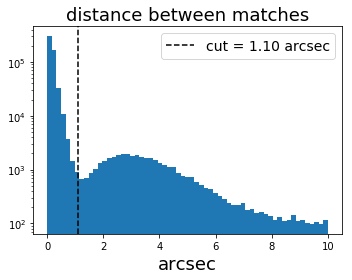

In [73]:
plt.figure(figsize=(5,4))
_ = plt.hist(dist,bins=61)
plt.axvline(1.1,ls='--',color='k',label='cut = %.2f arcsec'%(1.1))
plt.yscale('log')
plt.xlabel('arcsec',fontsize=18)
plt.legend(fontsize=14)
plt.title('distance between matches',fontsize=18)
plt.tight_layout()
plt.savefig(path+'match_distance.png')

In [74]:
perc = np.linspace(1,99.8,300)
dperc= np.percentile(dist,perc)

Text(0.5,0,'distance [arcesc]')

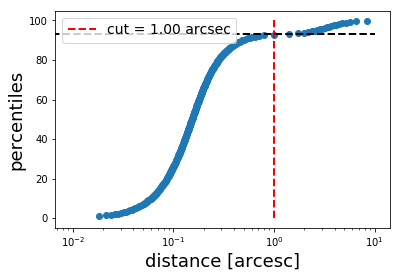

In [75]:
plt.scatter(dperc,perc)
plt.plot([1.,1.],[0,100],'r--',lw=2,label='cut = %.2f arcsec'%(1.0))
plt.plot([0.,10],[93,93],'k--',lw=2,label='_no_')
plt.xscale('log')
plt.legend(fontsize=14)
plt.ylabel('percentiles',fontsize=18)
plt.xlabel('distance [arcesc]',fontsize=18)

In [76]:
## Second match, with one arcsec

In [77]:
cat=smatch.Catalog(ra1, dec1, 1.1/3600, nside=nside)
print(cat)

cat.match(ra2, dec2, maxmatch=maxmatch)

print("found:",cat.nmatches,"matches")
matches = cat.matches

smatch catalog
    nside:               4096
    pixel area (sq deg): 0.000205
    npoints:             709987
('found:', 523255, 'matches')


In [78]:
cat=smatch.Catalog(ra1, dec1, 4./3600, nside=nside)
print(cat)

cat.match(ra2, dec2, maxmatch=maxmatch)

print("found:",cat.nmatches,"matches")
matches4 = cat.matches

smatch catalog
    nside:               4096
    pixel area (sq deg): 0.000205
    npoints:             709987
('found:', 549368, 'matches')


In [94]:
cat=smatch.Catalog(ra1, dec1, 1.1/3600, nside=nside)
print(cat)

cat.match(ra2[gal_idx], dec2[gal_idx], maxmatch=maxmatch)

print("found:",cat.nmatches,"matches")
matches1 = cat.matches

smatch catalog
    nside:               4096
    pixel area (sq deg): 0.000205
    npoints:             709987
('found:', 500175, 'matches')


# Which Threshold?

What would be the best radius distance in this case? 1 or 10 arcesec?


In [79]:
nmatch0 = np.setdiff1d(range(nsize['des']), matches0['i1'])
nmatch1 = np.setdiff1d(range(nsize['des']), matches['i1'])

In [80]:
des['COSMO'] = False
des['COSMO'][matches0['i1']] = True

In [81]:
des['COSMO_1arcsec'] = False
des['COSMO_1arcsec'][matches['i1']] = True

In [101]:
des['COSMO_1arcsec_gal']                 = False
des['COSMO_1arcsec_gal'][matches1['i1']] = True

In [102]:
def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [103]:
mag = np.array(des['MAG_I'])

In [104]:
dm     = 1./2
mbins  = np.arange(18,30+dm,dm)
keys,mb= makeBins(mag,mbins)

In [105]:
def compute_fraction_matched(mask,indices):
    return 1.*np.count_nonzero(mask[indices])/len(indices)

In [108]:
fm0 = [compute_fraction_matched(des['COSMO'],idx) for idx in keys]
fm1 = [compute_fraction_matched(des['COSMO_1arcsec'],idx) for idx in keys]
fm2 = [compute_fraction_matched(des['COSMO_1arcsec_gal'],idx) for idx in keys]

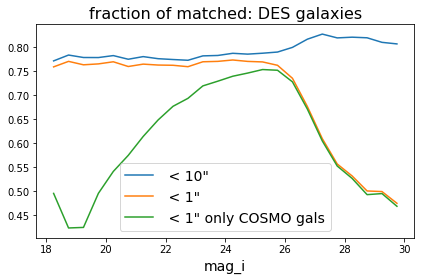

In [111]:
plt.plot(mb,fm0,label=' < 10"')
plt.plot(mb,fm1,label=' < 1"')
plt.plot(mb,fm2,label=' < 1" only COSMO gals')
plt.legend(fontsize=14)
plt.xlabel('mag_i',fontsize=14)
plt.title('fraction of matched: DES galaxies',fontsize=16)
plt.tight_layout()
plt.savefig(path+'matched_frac_des_gals.png')

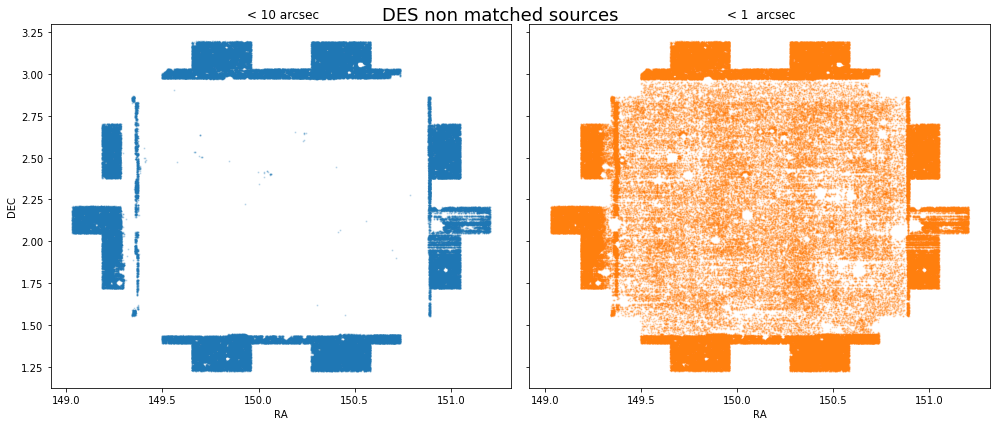

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(14,6), sharex='all',sharey='all')

axis[0].scatter(des['RA'][nmatch0],des['DEC'][nmatch0],s=1,alpha=0.2)
axis[1].scatter(des['RA'][nmatch1],des['DEC'][nmatch1],s=1,alpha=0.2,color='tab:orange')

axis[1].set_xlabel('RA')
axis[0].set_xlabel('RA')
axis[0].set_ylabel('DEC')

axis[0].set_title(' < 10 arcsec')
axis[1].set_title(' < 1  arcsec')

fig.suptitle('DES non matched sources',fontsize=18)
fig.tight_layout()
plt.savefig(path+'non_matched_sky_plot.png')

In [ ]:
1.*matches0['i2'].size/nsize['cosmo']

#### Comments
the DECam psf is ~1", but objects like stars are centroided to 1/10 or 1/00 of the PSF. Location isn’t the problem, deblending noise is the problem, and how objects are grouped into pixels to run the centroid on. Going to scales larger than the PSF is, after the random match background is understood, a study of deblending. Our focus is on a pure, isolated sample of galaxies to test stellar mass computation, so we stay close to the PSF.

In [112]:
match['DES'] = False
match['DES'][matches0['i2']] = True

In [113]:
match['DES_1arcsec'] = False
match['DES_1arcsec'][matches['i2']] = True

In [122]:
match['DES_1arcsec_gal']                         = False
match['DES_1arcsec_gal'][gal_idx[matches1['i2']]] = True

In [123]:
def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [124]:
mag = np.array(match['ip_MAG_AUTO'])

In [125]:
dm     = 1./2
mbins  = np.arange(18,30+dm,dm)
keys,mb= makeBins(mag,mbins)

In [126]:
def compute_fraction_matched(mask,indices):
    return 1.*np.count_nonzero(mask[indices])/len(indices)

In [127]:
fm0 = [compute_fraction_matched(match['DES'],idx) for idx in keys]
fm1 = [compute_fraction_matched(match['DES_1arcsec'],idx) for idx in keys]
fm2 = [compute_fraction_matched(match['DES_1arcsec_gal'],idx) for idx in keys]

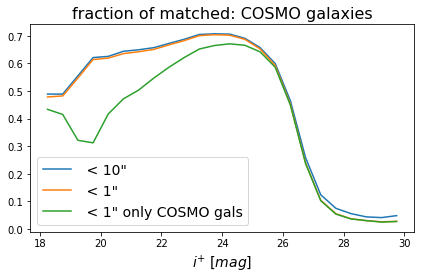

In [131]:
plt.plot(mb,fm0,label=' < 10"')
plt.plot(mb,fm1,label=' < 1"')
plt.plot(mb,fm2,label=' < 1" only COSMO gals')
plt.legend(fontsize=14)
plt.xlabel(r'$i^{\plus} \; [mag]$',fontsize=14)
plt.title('fraction of matched: COSMO galaxies',fontsize=16)
plt.tight_layout()
plt.savefig(path+'matched_frac_cosmo_gals.png')

## Saving my selections

In [ ]:
indices1,indices4,indices10 = [],[],[]

indices1.append(np.array(des[matches['i1']]['row']))  ##  1 arcesc
indices4.append(np.array(des[matches4['i1']]['row'])) ##  3 arcesc
indices10.append(np.array(des[matches0['i1']]['row'])) ## 10 arcesc

indices1.append(np.array(match[matches['i2']]['ID']))  ##  1 arcesc
indices4.append(np.array(match[matches4['i2']]['ID'])) ##  3 arcesc
indices10.append(np.array(match[matches0['i2']]['ID'])) ## 10 arcesc

In [ ]:
names = ['../data/%s_indices_matched'%field for field in ['des','cosmos']]

In [ ]:
for i,name in enumerate(names):
    np.save('%s_01arcsec.npy'%name,indices1[i]) # np.load('%s_1arcsec.npy'%name)
    np.save('%s_04arcsec.npy'%name,indices4[i])
    np.save('%s_10arcsec.npy'%name,indices10[i])

In [ ]:
# id1 = np.load('%s_1arcsec.npy'%name)

In [ ]:
1.*indices4[0].size/indices10[0].size

In [ ]:
1.*indices10[0].size/nsize['des']

In [ ]:
indices10[0].size